In [1]:
library(questionr)
library(car)
library(caret)
library(Hmisc)
library(readxl)
library(corrplot)
library(ggplot2)
library(tidyr)
library(dplyr)

Loading required package: carData

Loading required package: lattice

Loading required package: ggplot2

Loading required package: survival


Attaching package: 'survival'


The following object is masked from 'package:caret':

    cluster


Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:questionr':

    describe, wtd.mean, wtd.table, wtd.var


The following objects are masked from 'package:base':

    format.pval, units


corrplot 0.88 loaded


Attaching package: 'dplyr'


The following objects are masked from 'package:Hmisc':

    src, summarize


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [12]:
datos <- read_excel("./DatosEleccionesEuropeas2019.xlsx")

In [14]:
source("./FuncionesMineriaAida.R")

### Depuración de datos

In [15]:
# 1. Asignar variables categóricas como factores
datos[,c(12,13,32)] <- lapply(datos[,c(12,13,32)], as.factor)

In [16]:
# 2. Variables numéricas toman más de 10 valores.
sapply(Filter(is.numeric, datos), function(x) length(unique(x)))

VotosEmitidos                 Abstenciones 
                        2962                         2040 
                     Blancos                        Nulos 
                         319                          314 
                          Cs                           PP 
                        1072                         1489 
                        PSOE                          VOX 
                        1909                          790 
                     Podemos                        Otros 
                        1049                         1357 
                       Censo                   Population 
                        3287                         3489 
            Age_under19_Ptge              Age_over65_Ptge 
                        6002                         6773 
         WomanPopulationPtge               ForeignersPtge 
                        4519                         5077 
              UniversityPtge                totalEmpresas 
                        1997                         1226 
               IndustriaPtge             ConstruccionPtge 
                        1328                         1452 
     ComercTTEHosteleriaPtge                ServiciosPtge 
                        1796                         1858 
                   Inmuebles                   Superficie 
                        3123                         5709 
                    Densidad                PobChange_pct 
                        4642                         3048 
            PersonasInmueble                Explotaciones 
                         283                          762 
            UnemploymentPtge        WomenUnemploymentPtge 
                        1443                         1785 
         UnemployLess25_Ptge          UnemployMore40_Ptge 
                        1174                         1914 
 AgricultureUnemploymentPtge     IndustryUnemploymentPtge 
                        1540                         1622 
ConstructionUnemploymentPtge     ServicesUnemploymentPtge 
                        1322                         2129 
               AutonomosPtge 
                        1939

In [17]:
# Análisis datos:
summary(datos)

  CodigoINE         VotosEmitidos      Abstenciones       Blancos       
 Length:8110        Min.   :      1   Min.   :     0   Min.   :   0.00  
 Class :character   1st Qu.:    106   1st Qu.:    27   1st Qu.:   1.00  
 Mode  :character   Median :    341   Median :    93   Median :   5.00  
                    Mean   :   2783   Mean   :  1548   Mean   :  26.68  
                    3rd Qu.:   1379   3rd Qu.:   484   3rd Qu.:  18.00  
                    Max.   :1623866   Max.   :767525   Max.   :8211.00  
                                                                        
     Nulos               Cs                 PP                PSOE         
 Min.   :   0.00   Min.   :     0.0   Min.   :     0.0   Min.   :     0.0  
 1st Qu.:   1.00   1st Qu.:     8.0   1st Qu.:    25.0   1st Qu.:    25.0  
 Median :   4.00   Median :    26.0   Median :    75.0   Median :   101.0  
 Mean   :  23.87   Mean   :   336.1   Mean   :   555.8   Mean   :   906.4  
 3rd Qu.:  17.00   3rd Qu.:   104.8 

### Corrección de los errores detectados

In [18]:
#Valores fuera de rango de la variable porcentaje de desempleo
datos$UnemploymentPtge<-replace(datos$UnemploymentPtge, which((datos$UnemploymentPtge < 0)|(datos$UnemploymentPtge>100)), NA)

### Tratamiento de datos atípicos:

In [19]:
datos$varObjCont <- datos$PSOE / datos$VotosEmitidos * 100

In [20]:
datos$varObjBin <- ifelse(datos$PartidoMasVotado == "PSOE" | datos$PartidoMasVotado == "PP", 1, 0)

In [10]:
varObjCont<- datos$PSOE / datos$VotosEmitidos * 100
varObjBin <- ifelse(datos$PartidoMasVotado == "PSOE" | datos$PartidoMasVotado == "PP", 1, 0)
input <- as.data.frame(datos[,-(1:3)])
#row.names(input)<-datos$ID

Outliers identified in input$Blancos: 673 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed


Outliers identified in input$Nulos: 696 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




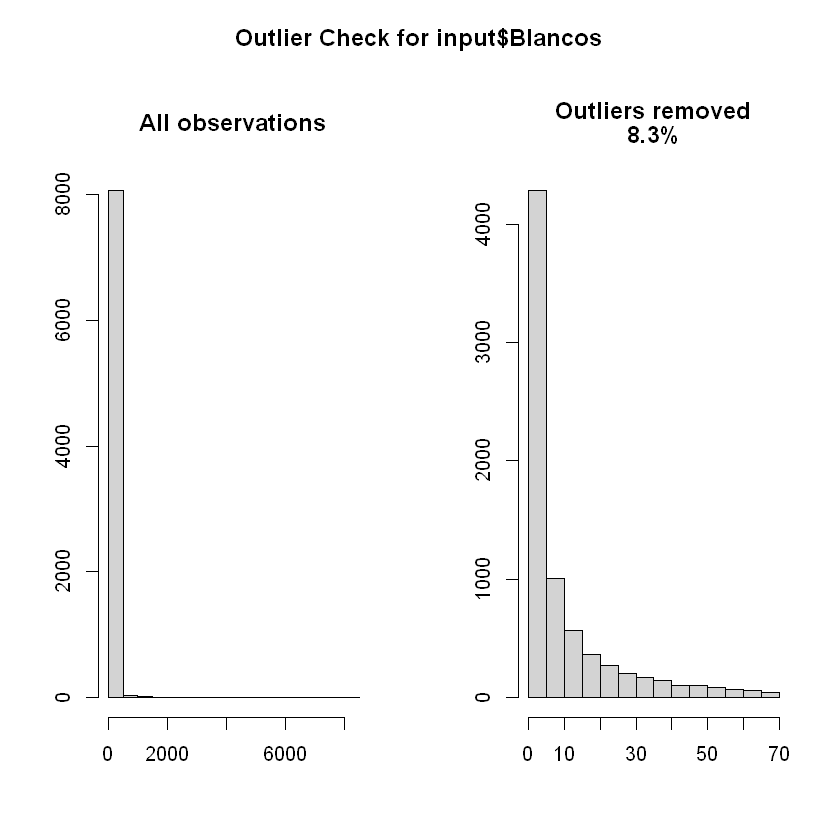

Outliers identified in input$Cs: 883 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




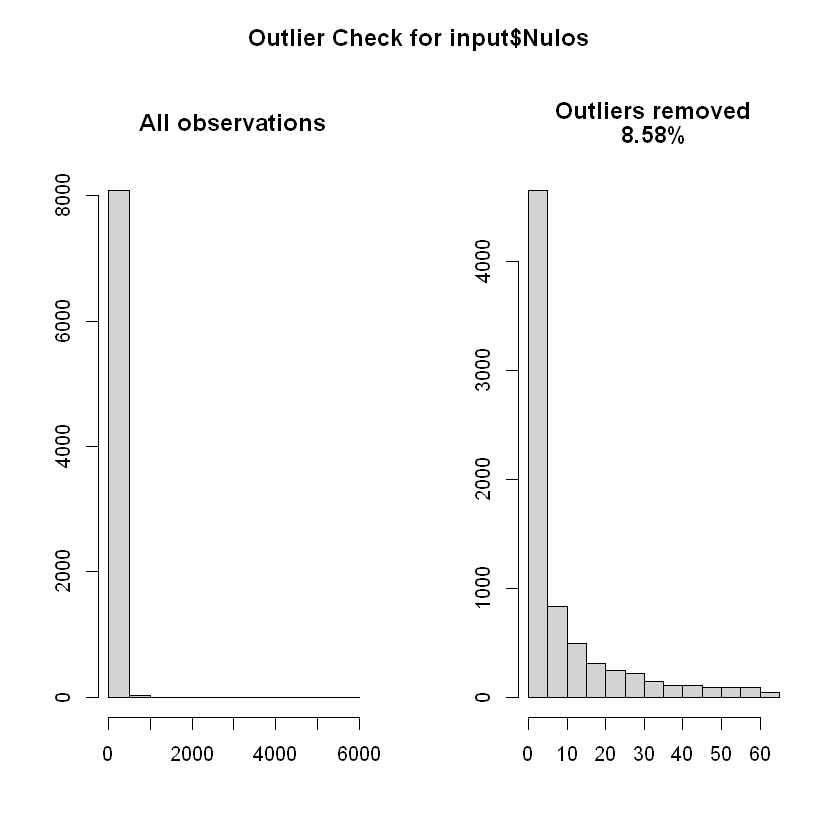

Outliers identified in input$PP: 712 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




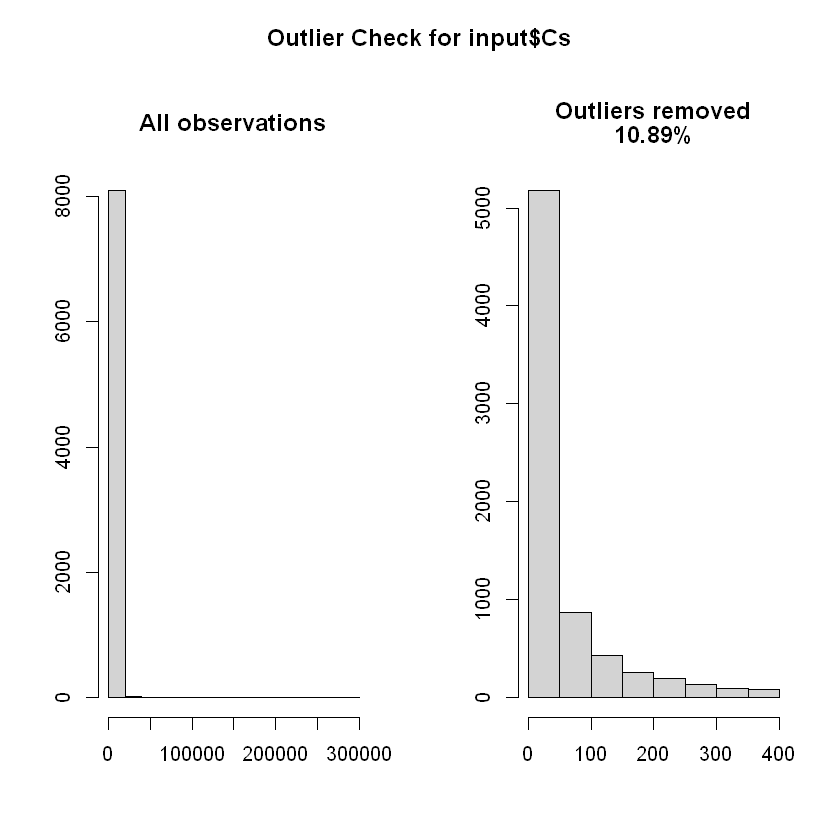

Outliers identified in input$PSOE: 690 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




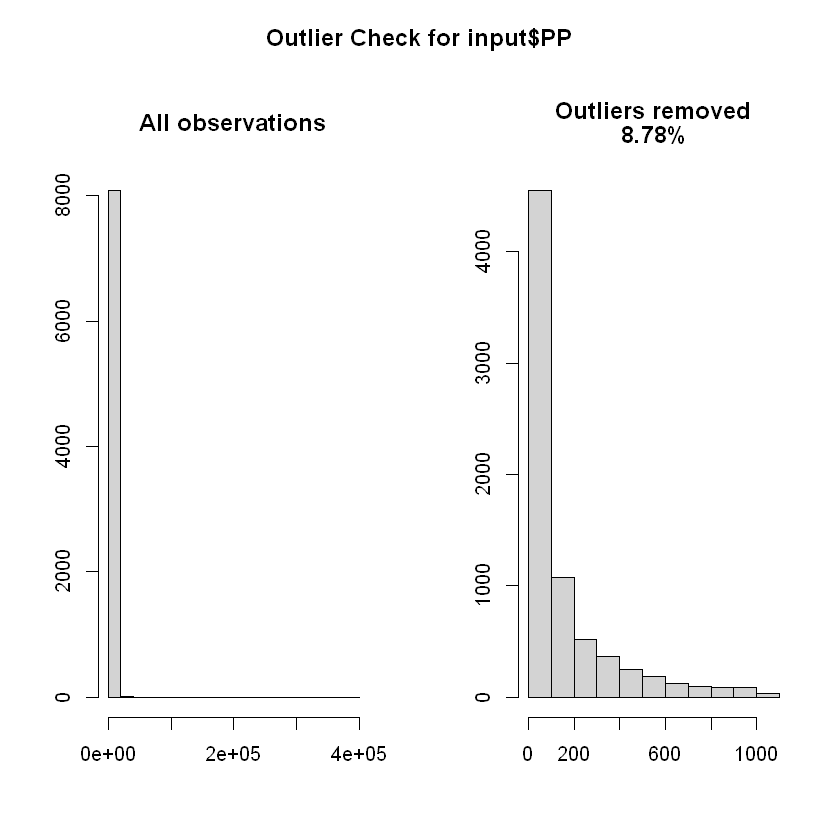

Outliers identified in input$VOX: 866 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




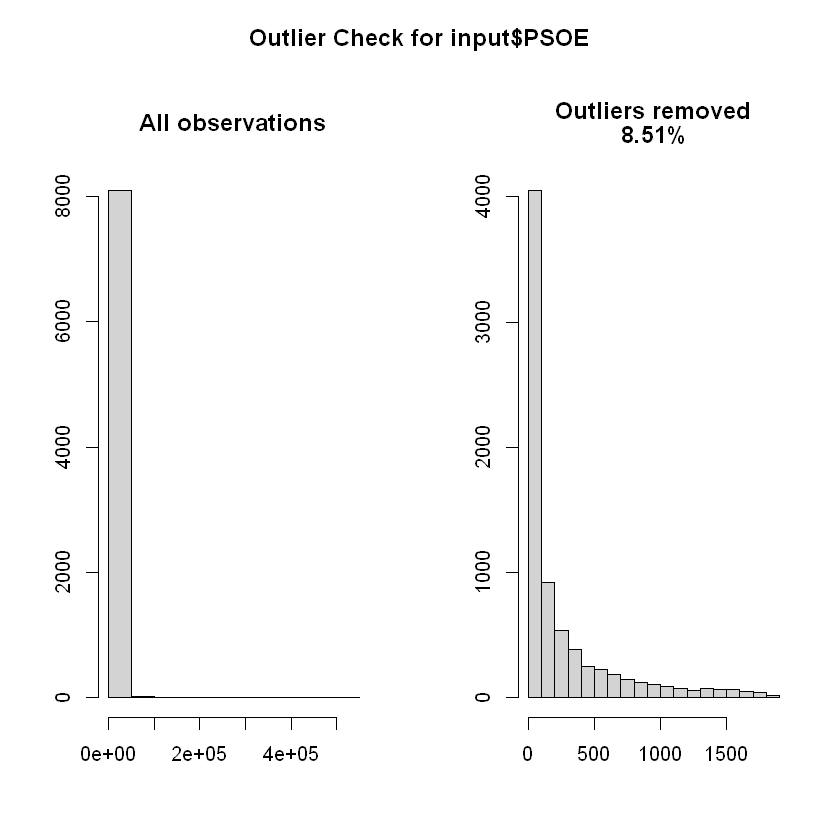

Outliers identified in input$Podemos: 933 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




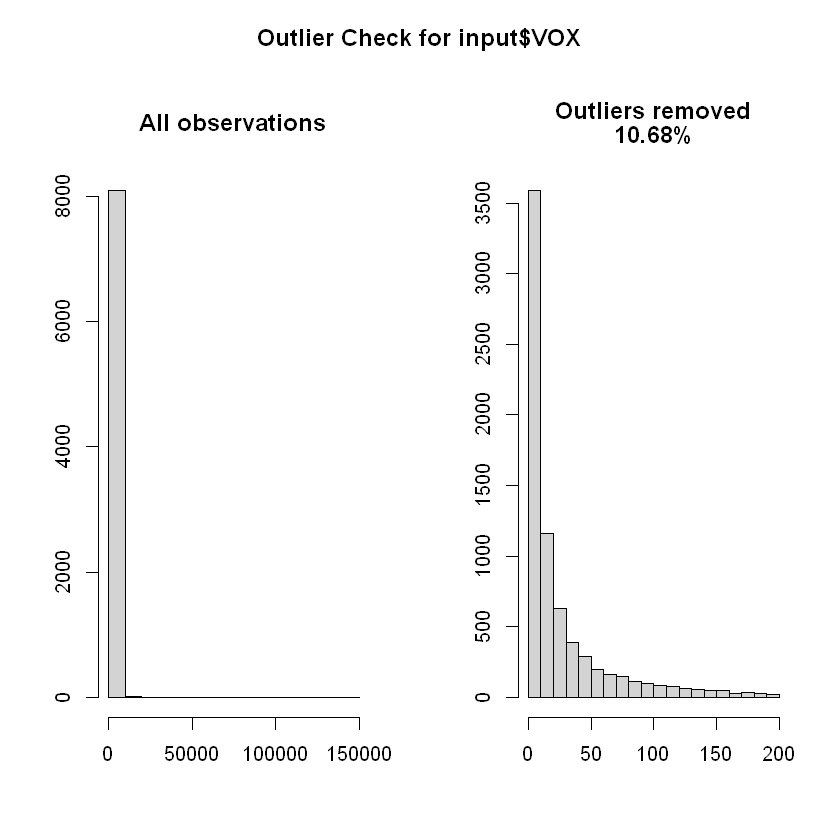

Outliers identified in input$Otros: 972 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




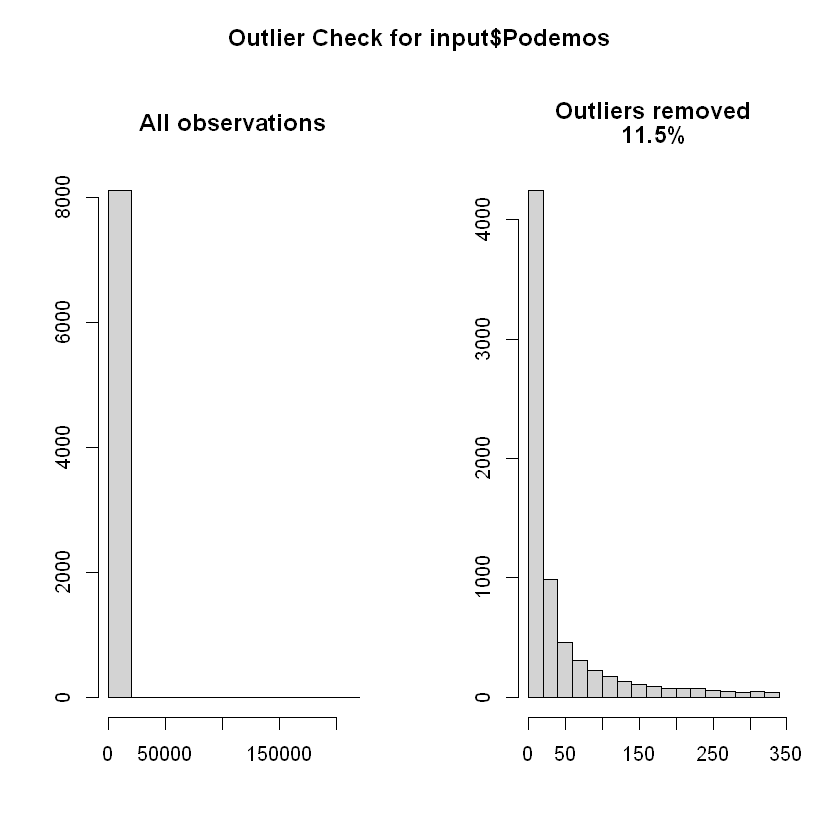

Outliers identified in input$Censo: 797 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




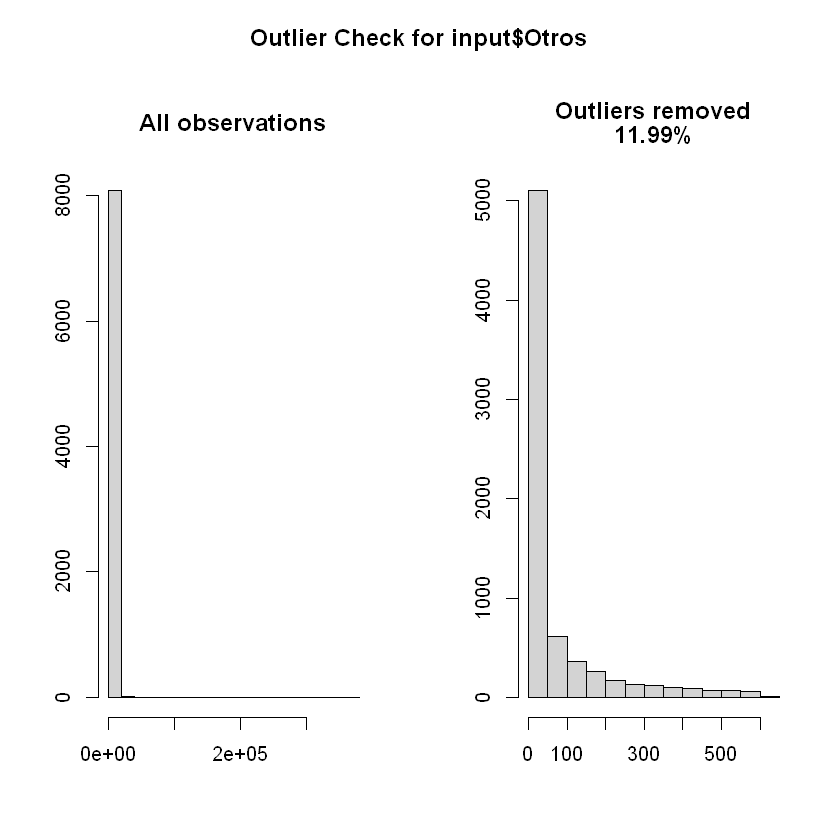

Outliers identified in input$Population: 813 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




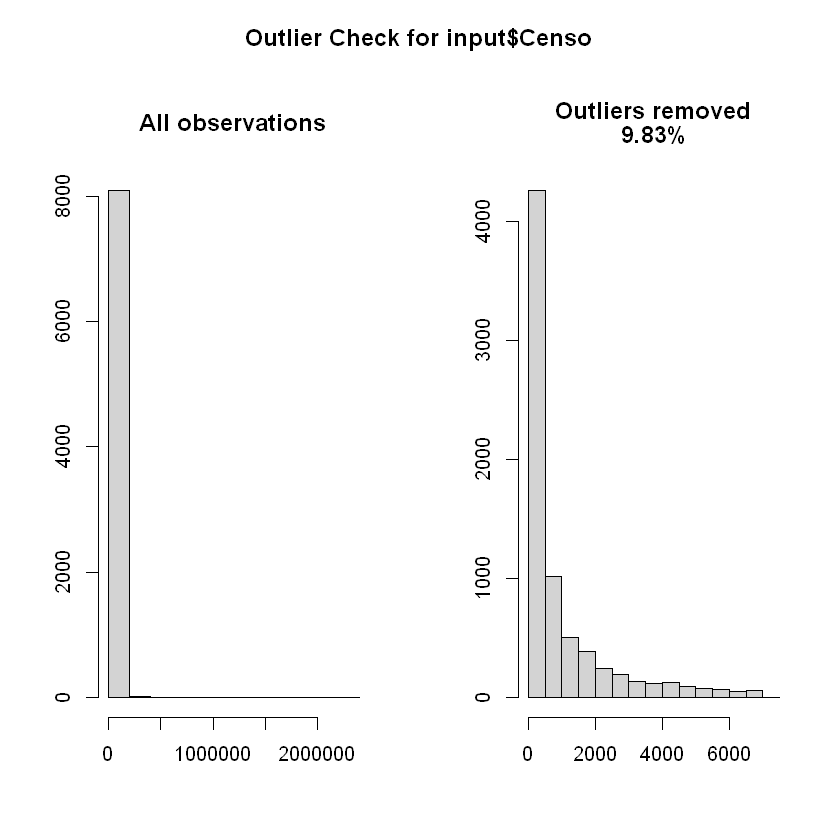

Outliers identified in input$Age_under19_Ptge: 0 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




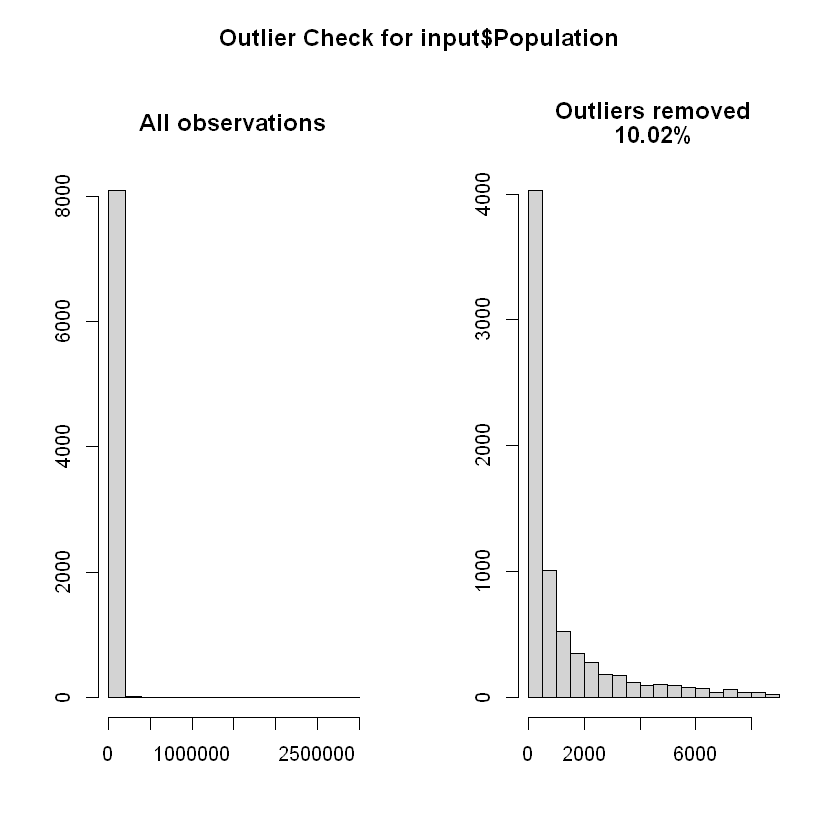

Outliers identified in input$Age_over65_Ptge: 0 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




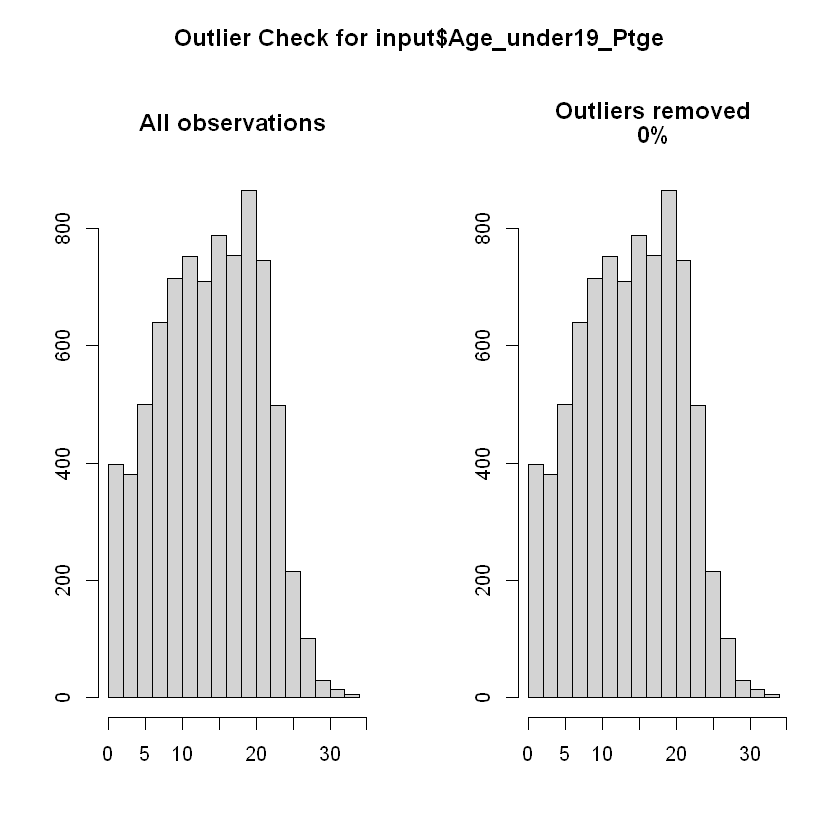

Outliers identified in input$WomanPopulationPtge: 108 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




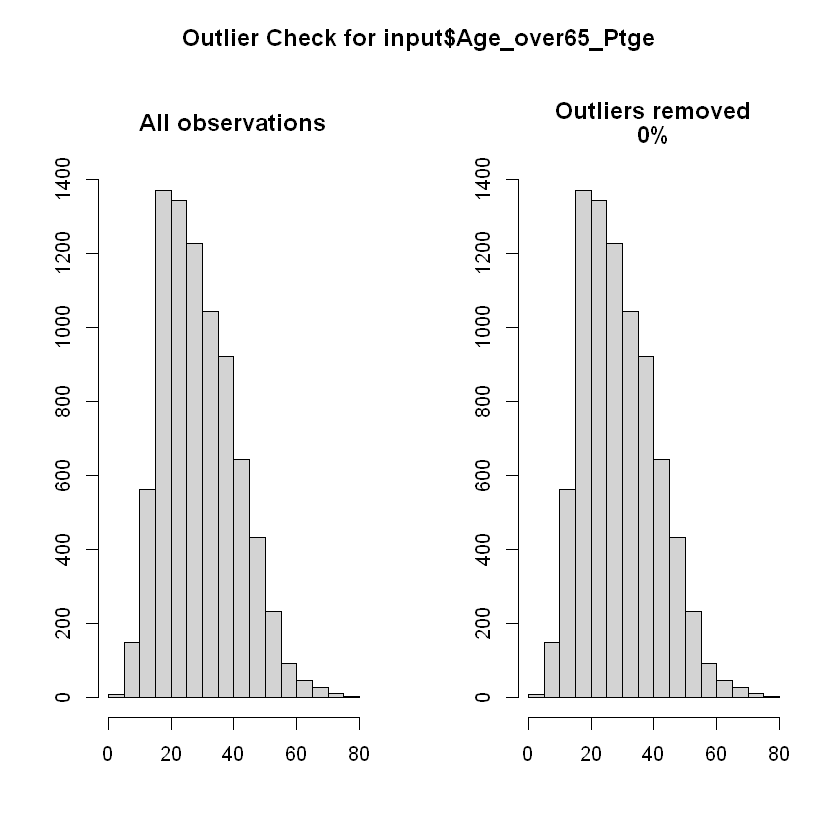

Outliers identified in input$ForeignersPtge: 125 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




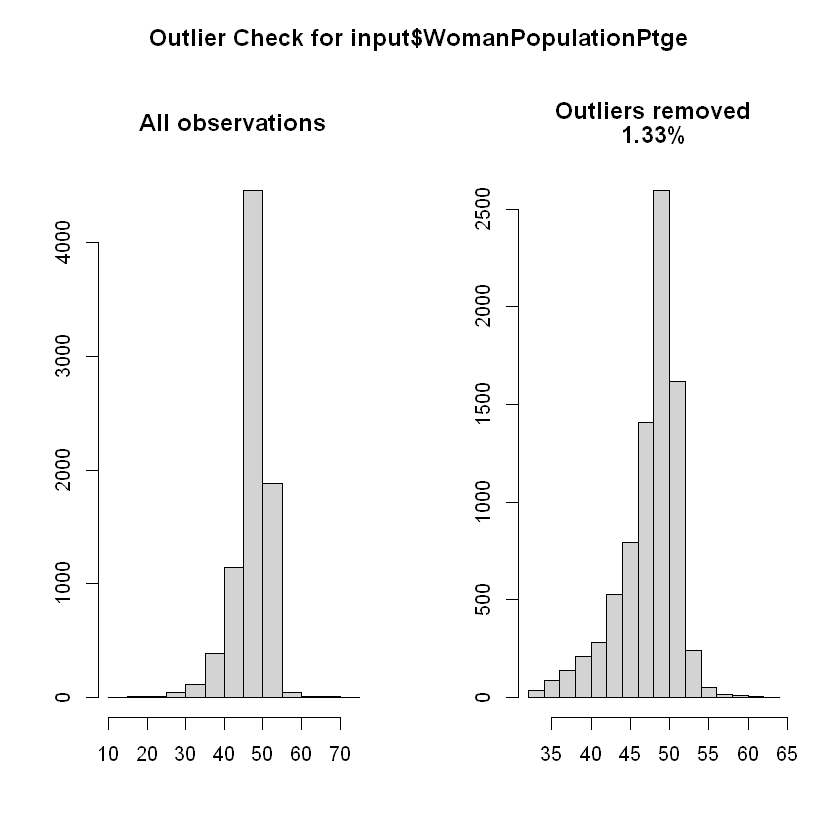

Outliers identified in input$UniversityPtge: 25 from 8104 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




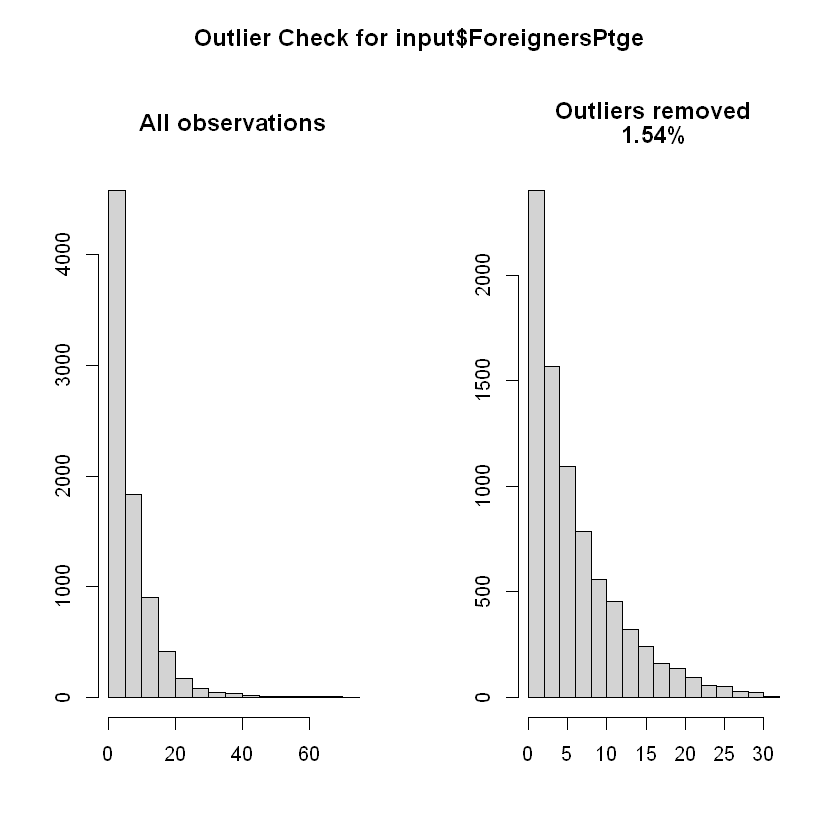

Outliers identified in input$totalEmpresas: 853 from 8105 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




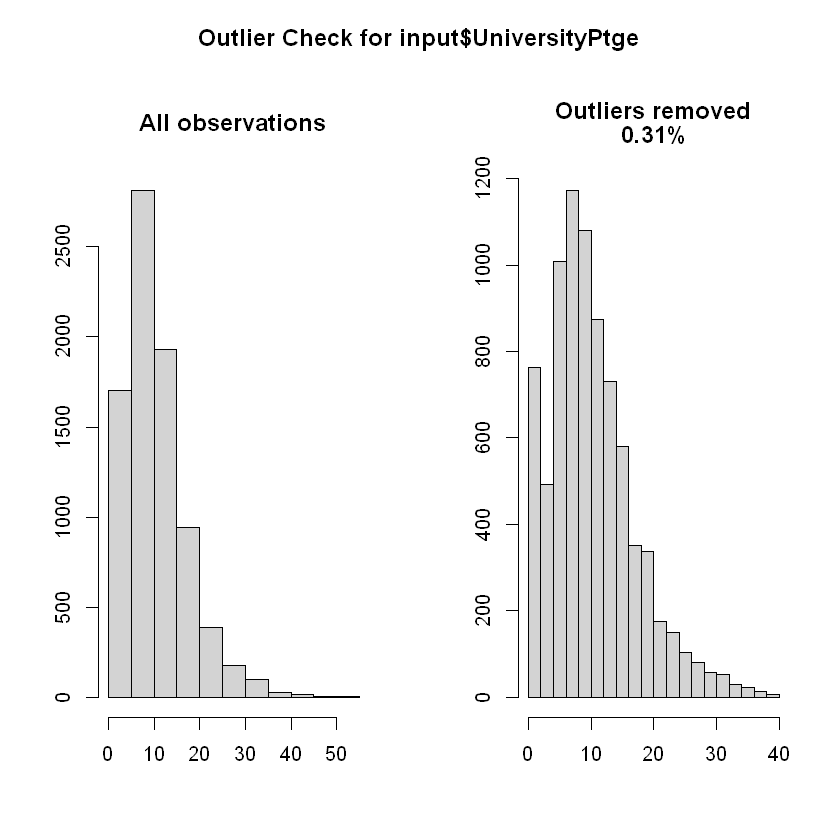

Outliers identified in input$IndustriaPtge: 49 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




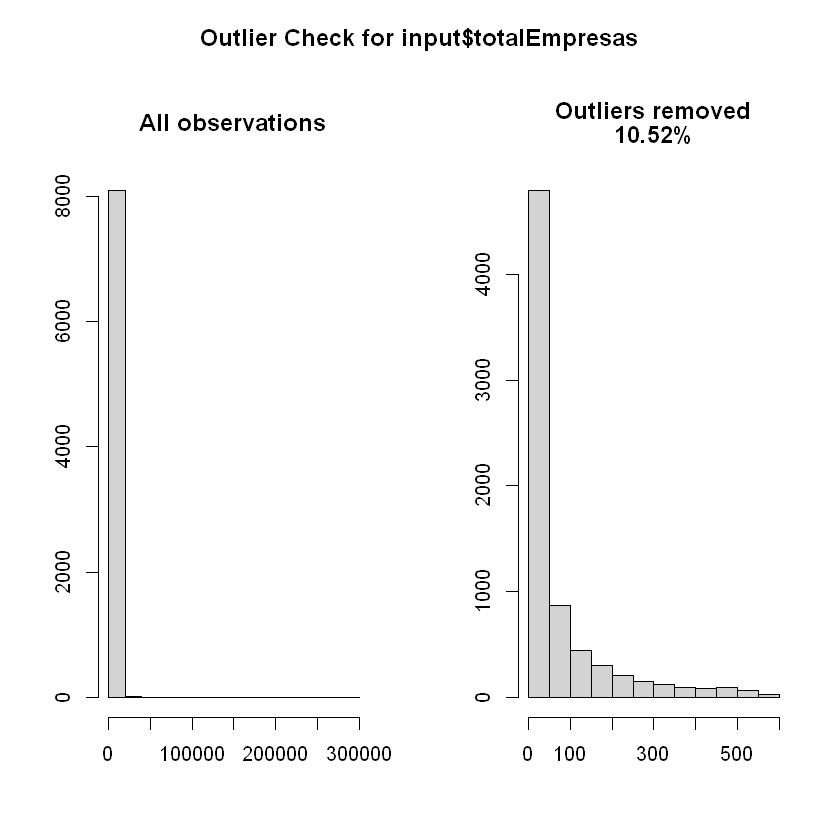

Outliers identified in input$ConstruccionPtge: 0 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




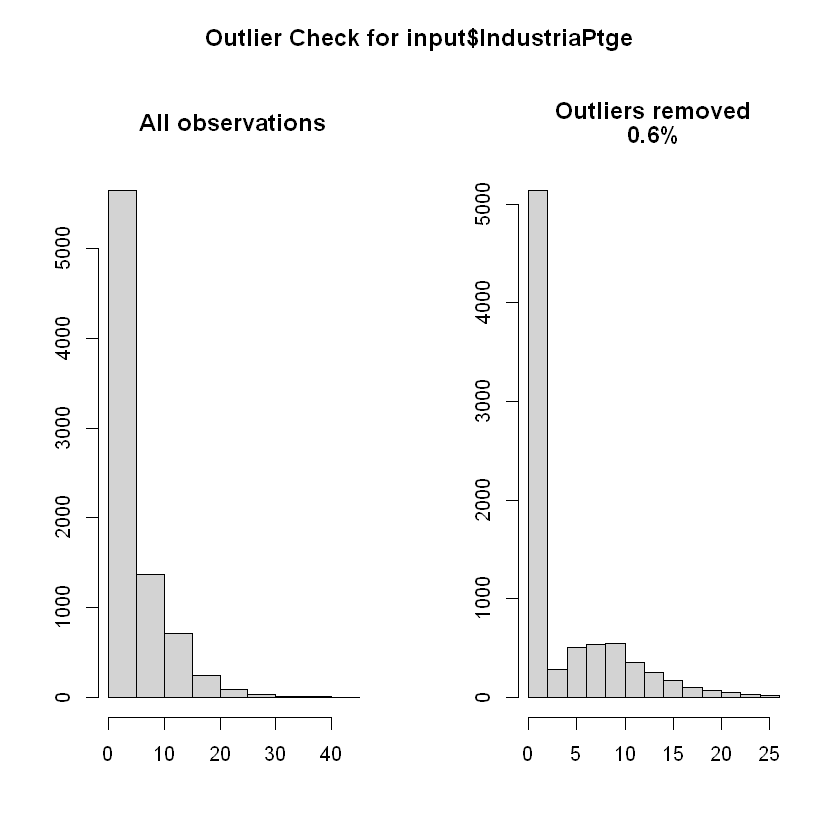

Outliers identified in input$ComercTTEHosteleriaPtge: 0 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




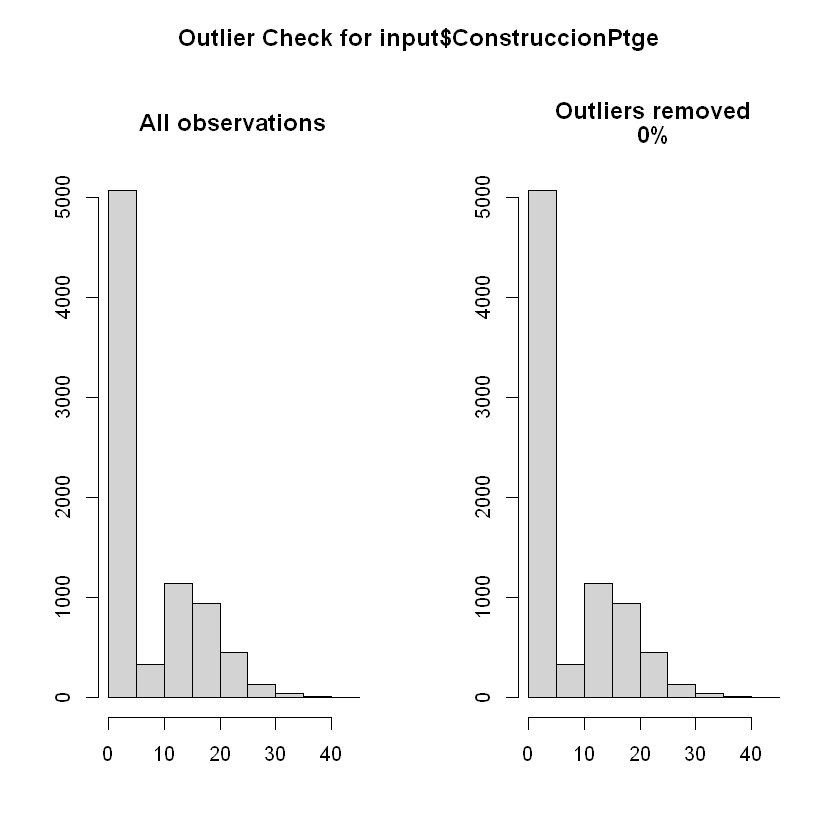

Outliers identified in input$ServiciosPtge: 0 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




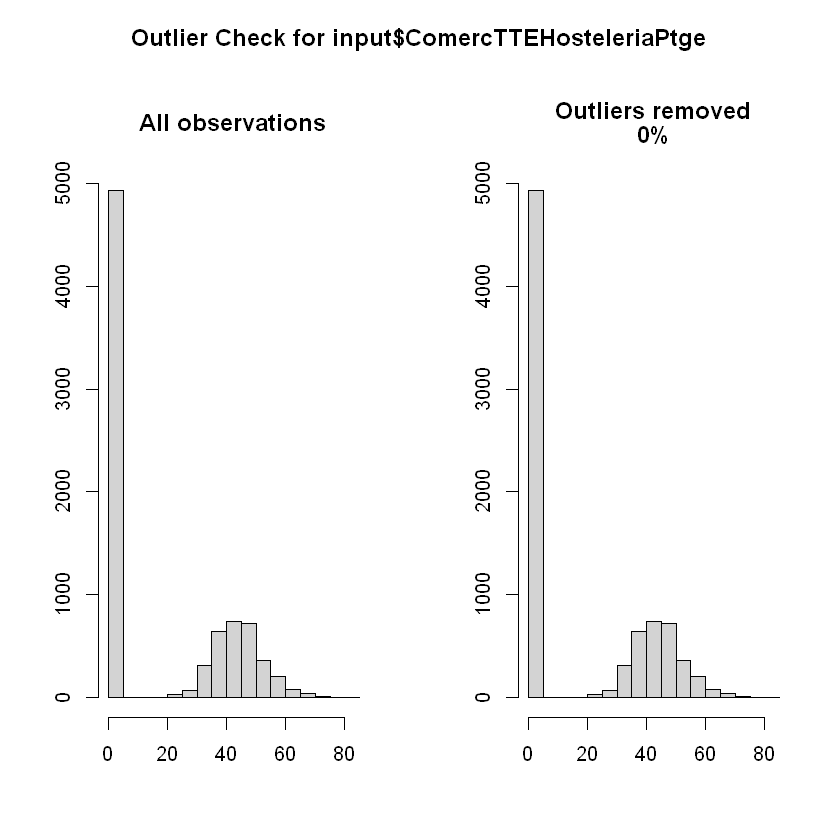

Outliers identified in input$Inmuebles: 731 from 8105 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




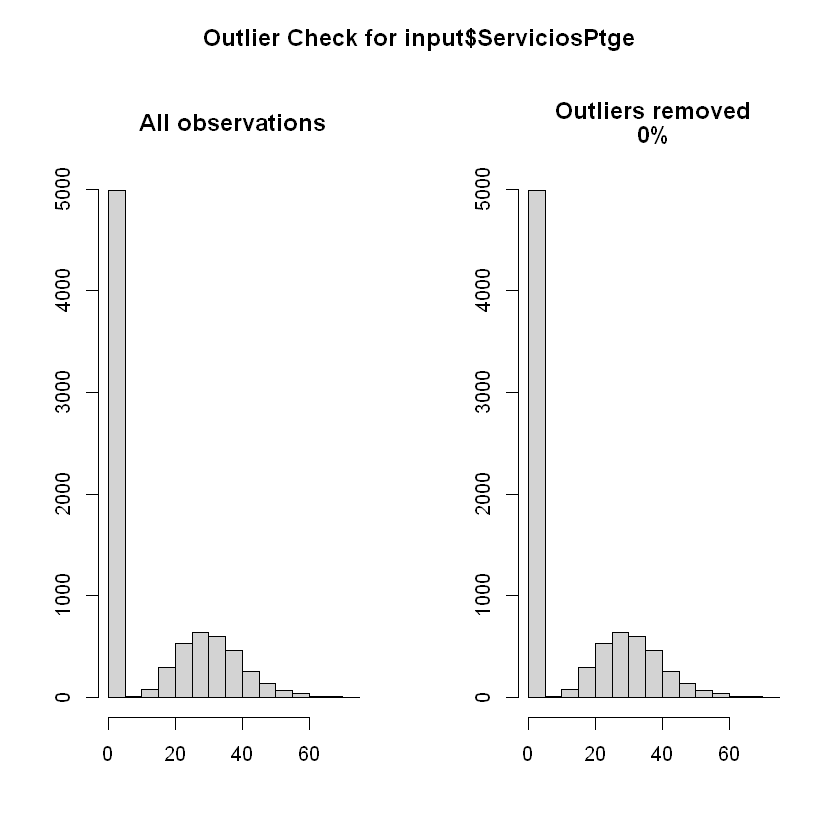

Outliers identified in input$Superficie: 339 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




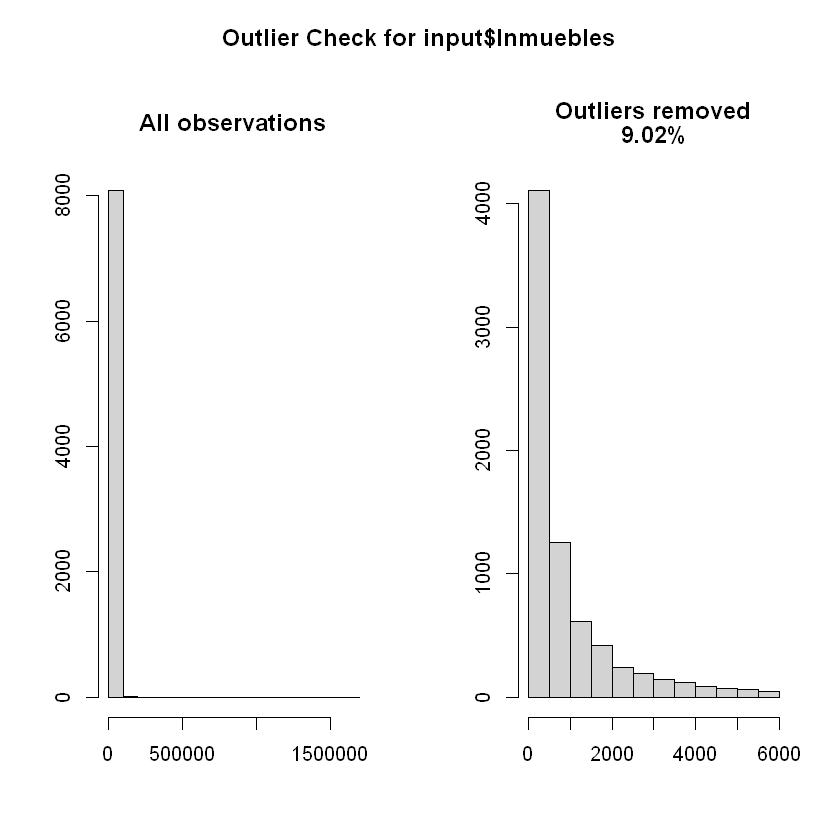

Outliers identified in input$Densidad: 927 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




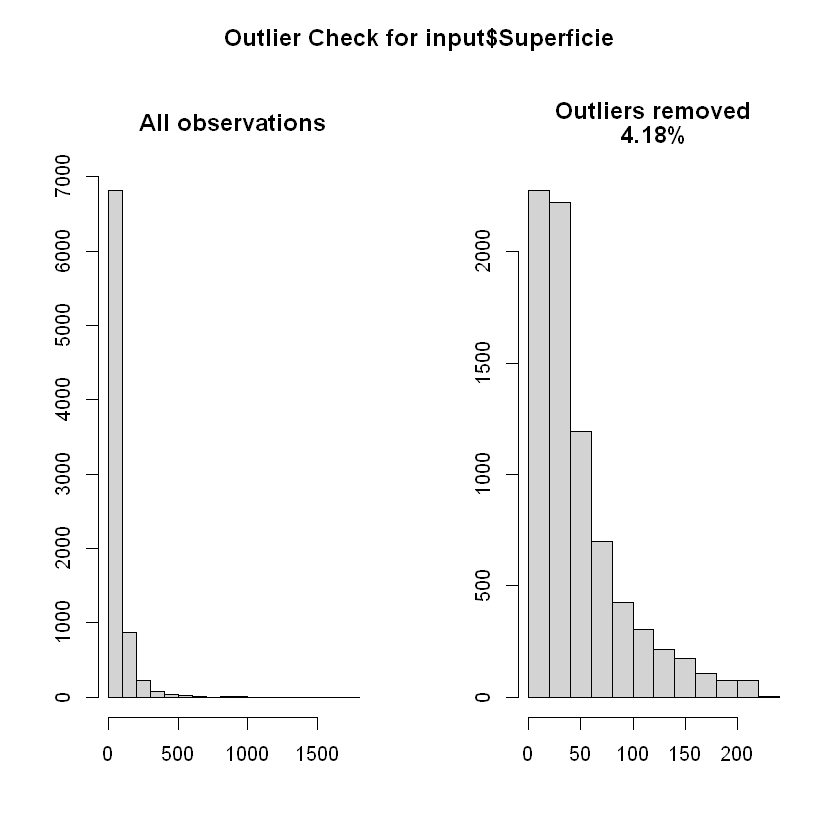

Outliers identified in input$PobChange_pct: 68 from 8103 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




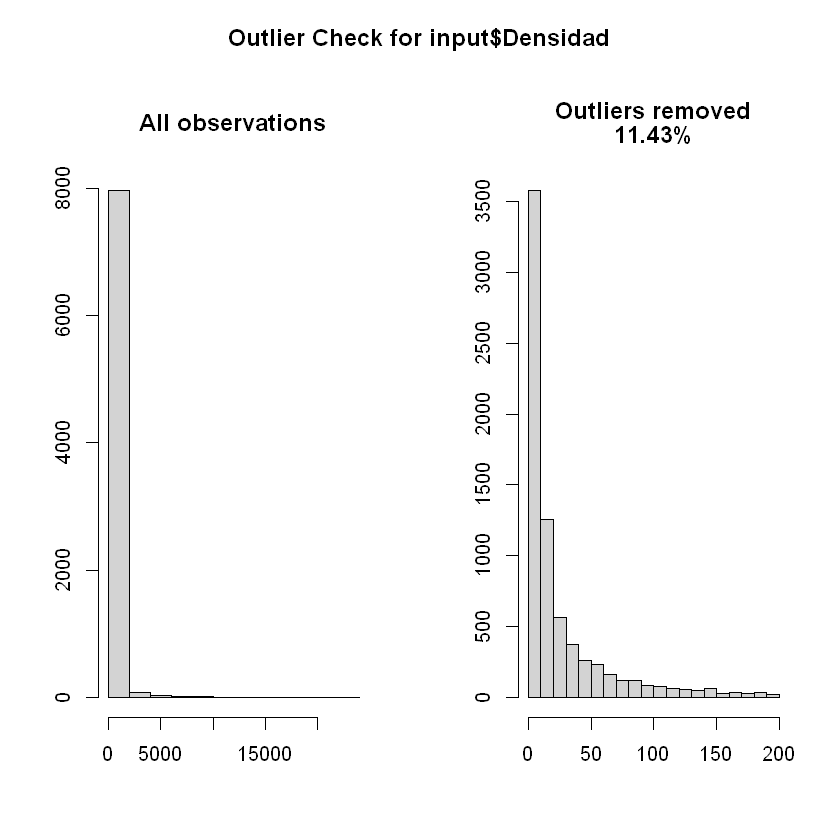

Outliers identified in input$PersonasInmueble: 0 from 8105 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




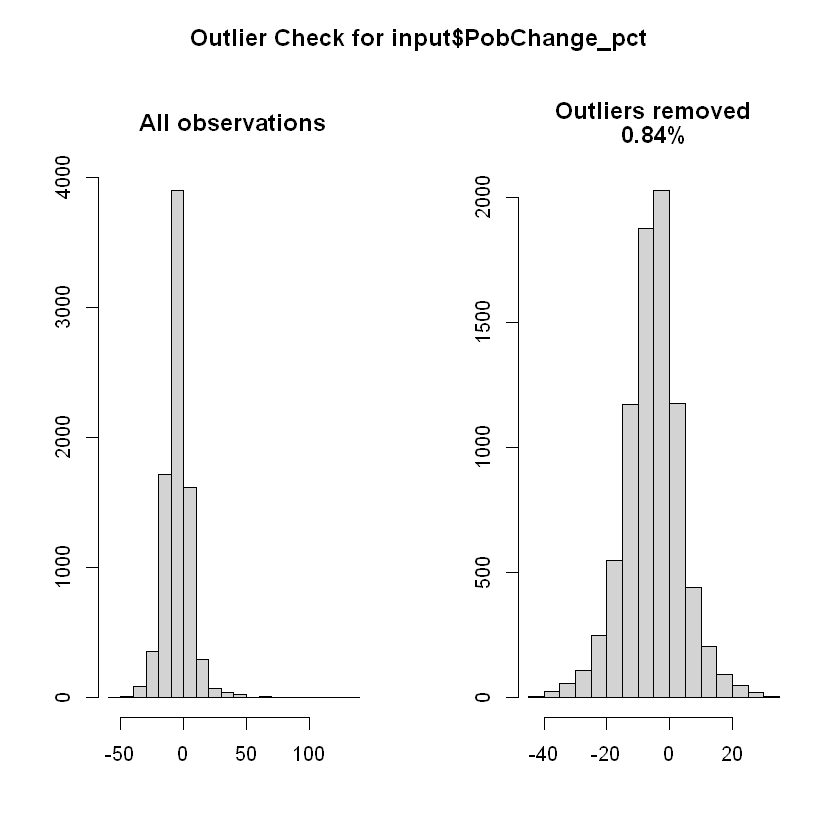

Outliers identified in input$Explotaciones: 438 from 8087 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




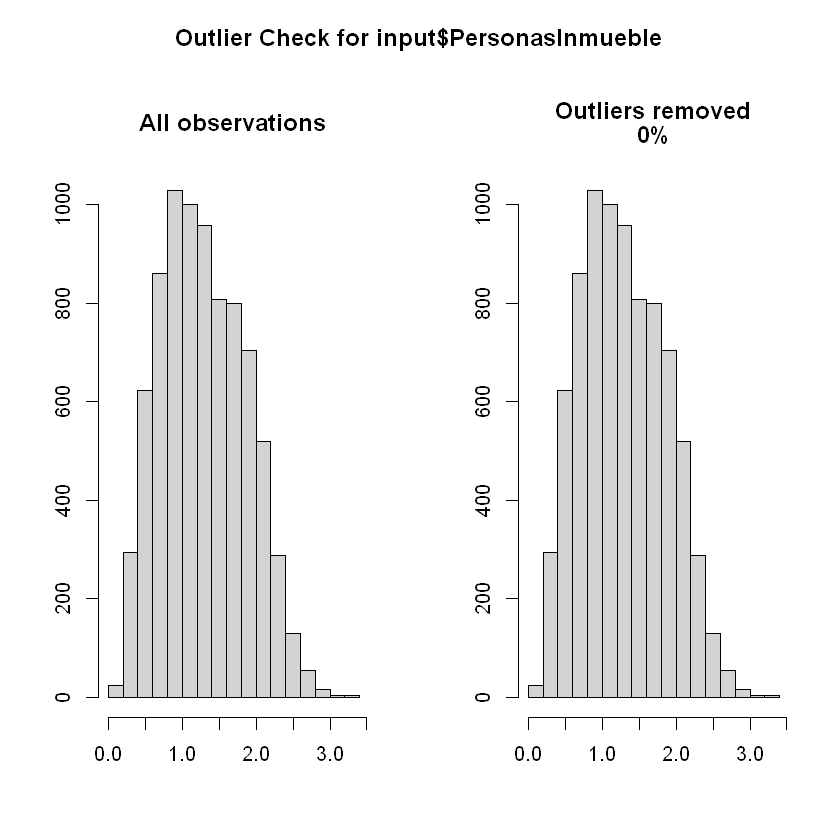

Outliers identified in input$UnemploymentPtge: 7 from 8108 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




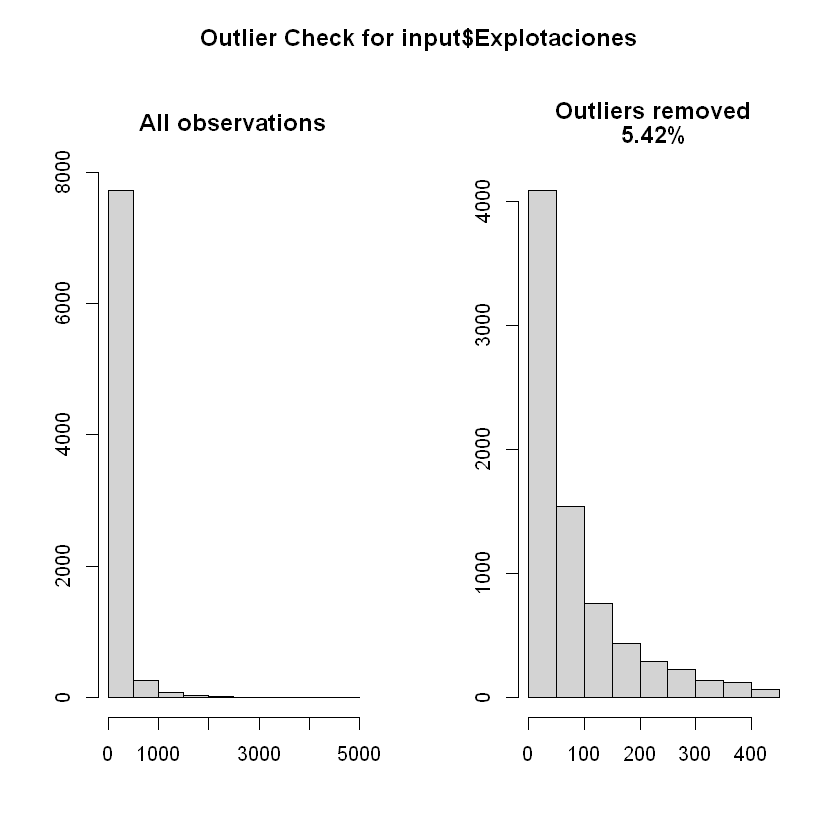

Outliers identified in input$WomenUnemploymentPtge: 0 from 8109 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




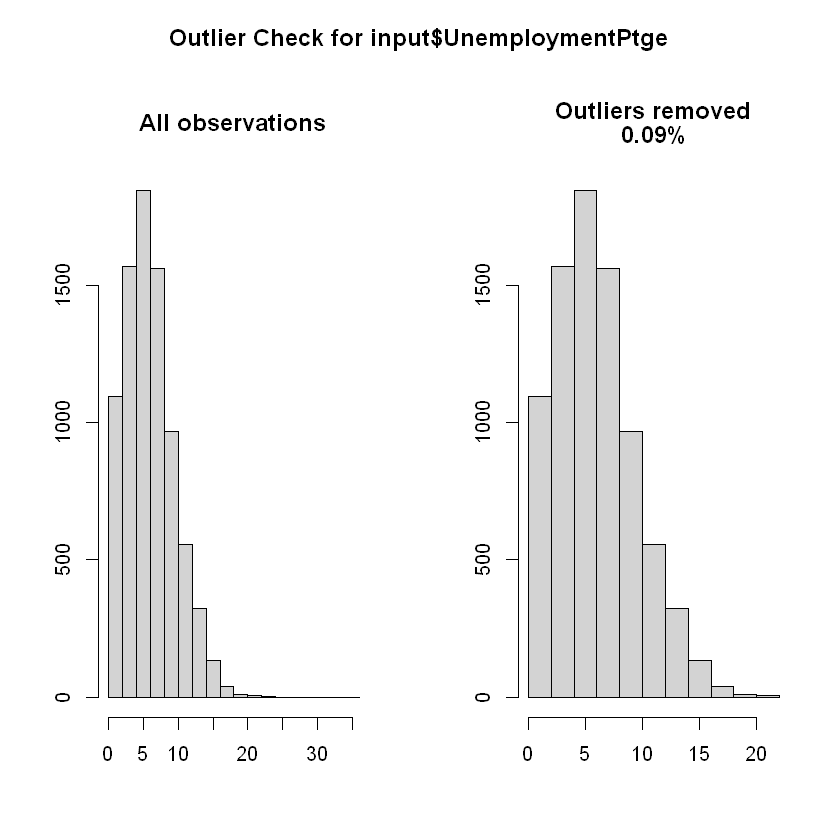

Outliers identified in input$UnemployLess25_Ptge: 82 from 8109 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




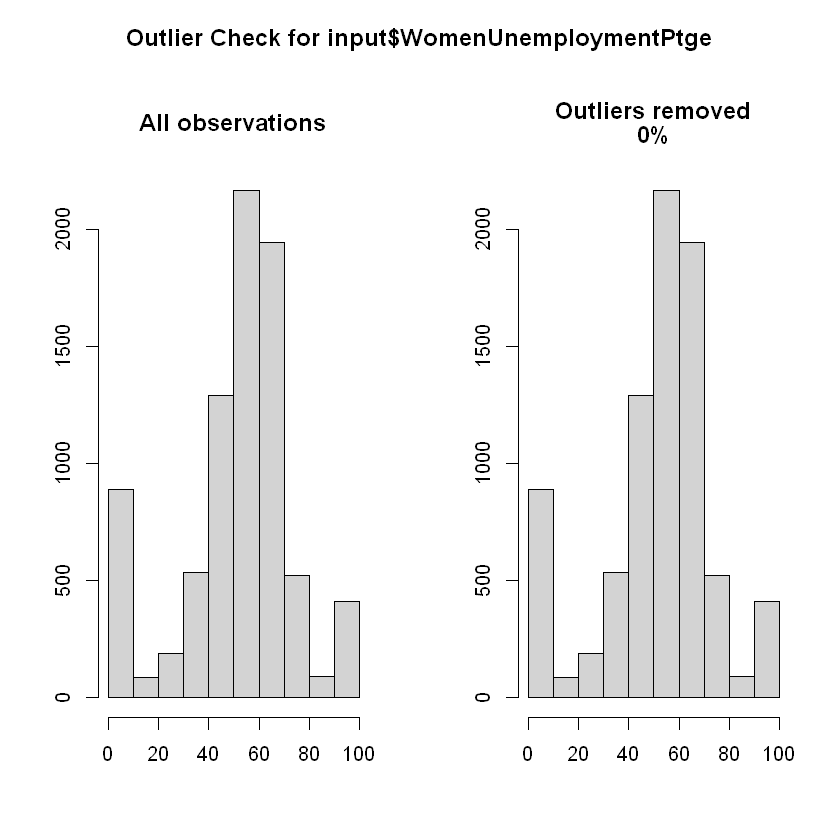

Outliers identified in input$UnemployMore40_Ptge: 0 from 8109 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




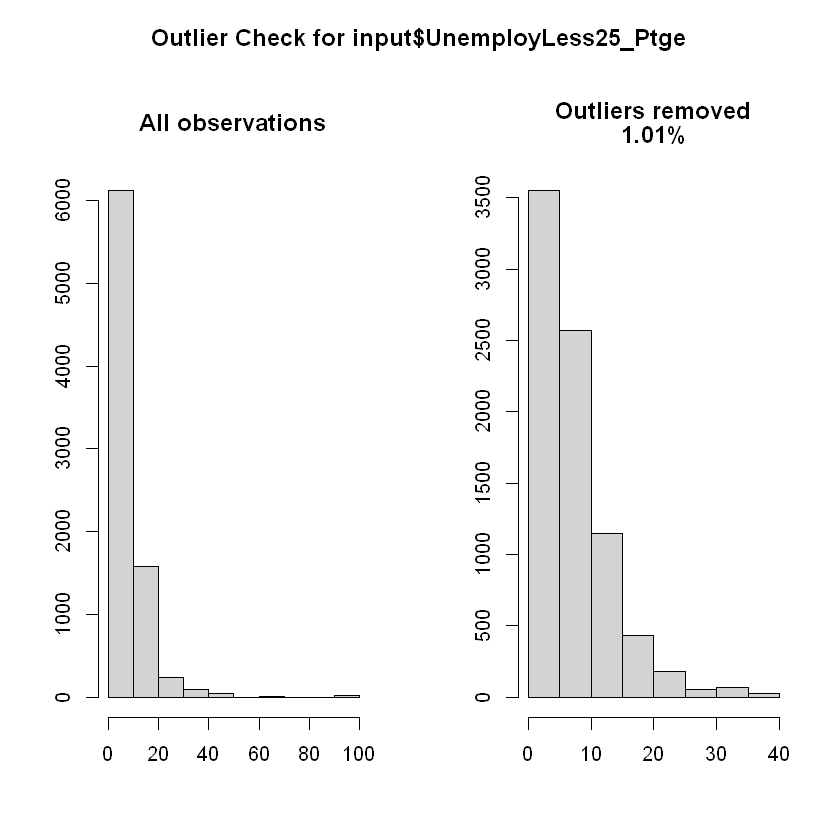

Outliers identified in input$AgricultureUnemploymentPtge: 178 from 8109 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




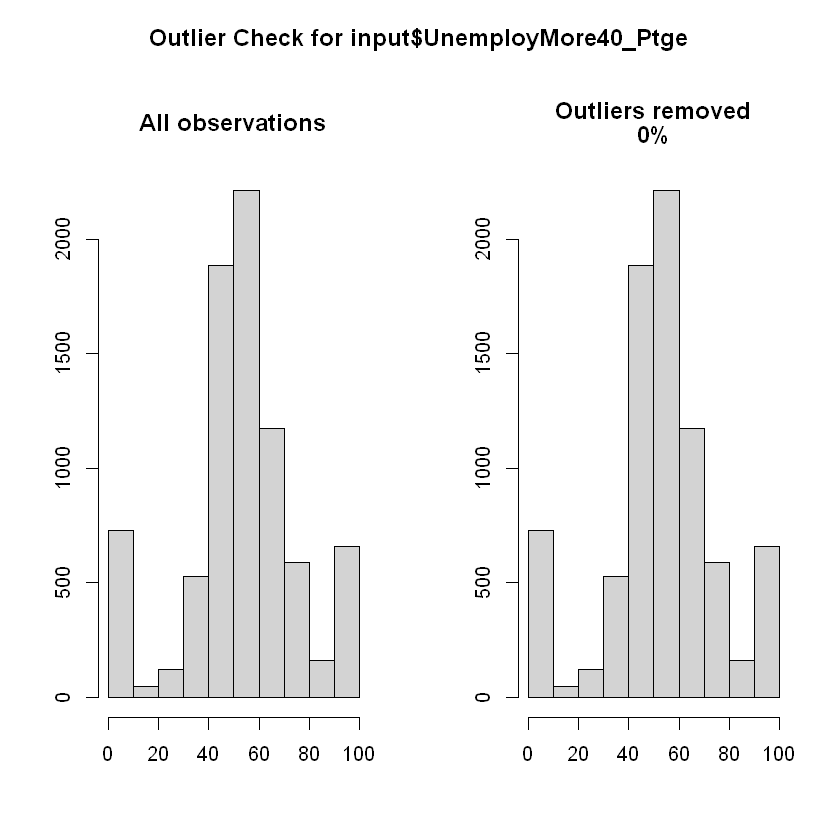

Outliers identified in input$IndustryUnemploymentPtge: 72 from 8109 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




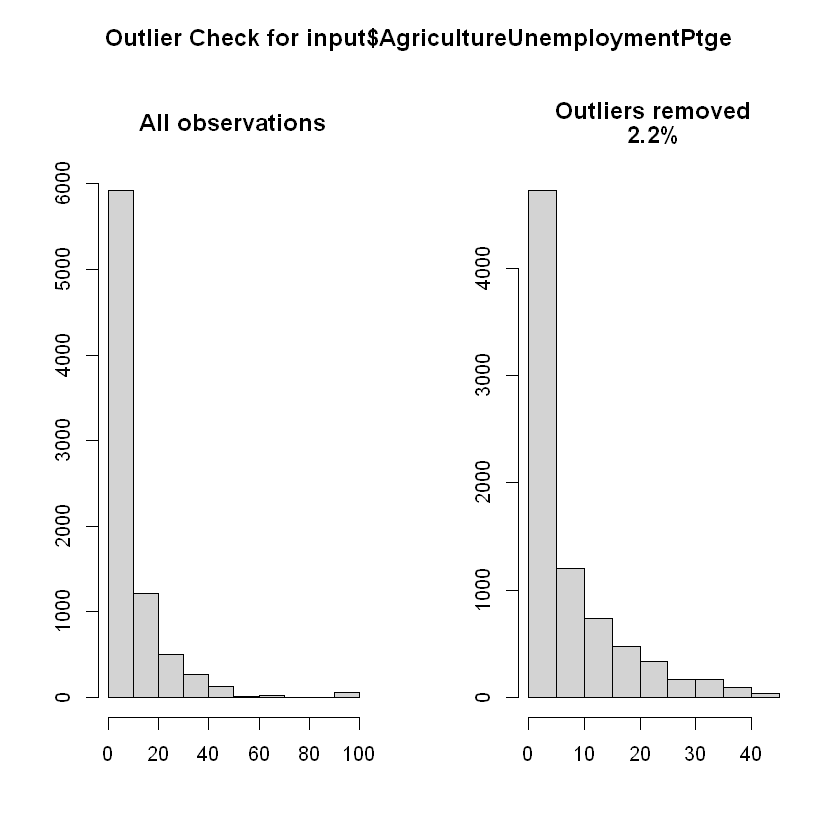

Outliers identified in input$ConstructionUnemploymentPtge: 195 from 8109 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




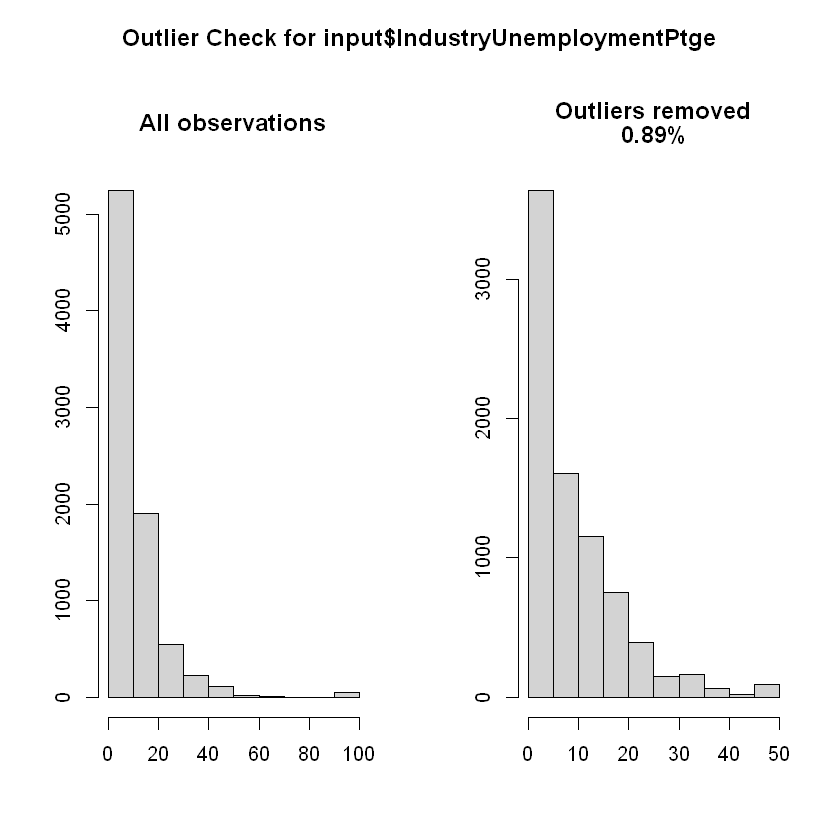

Outliers identified in input$ServicesUnemploymentPtge: 0 from 8109 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




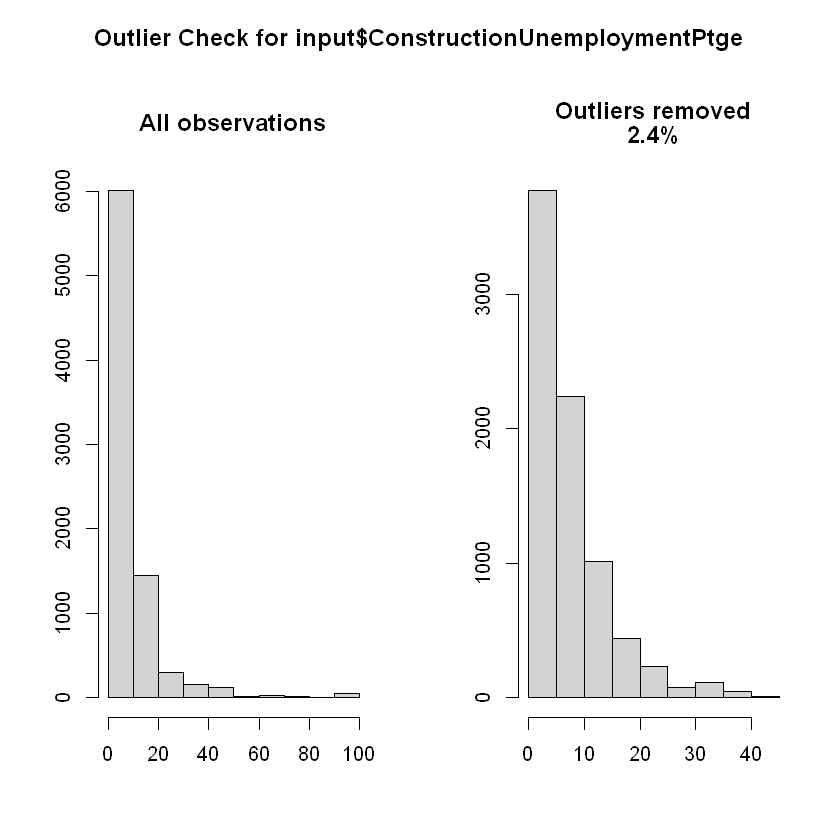

Outliers identified in input$AutonomosPtge: 28 from 8096 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




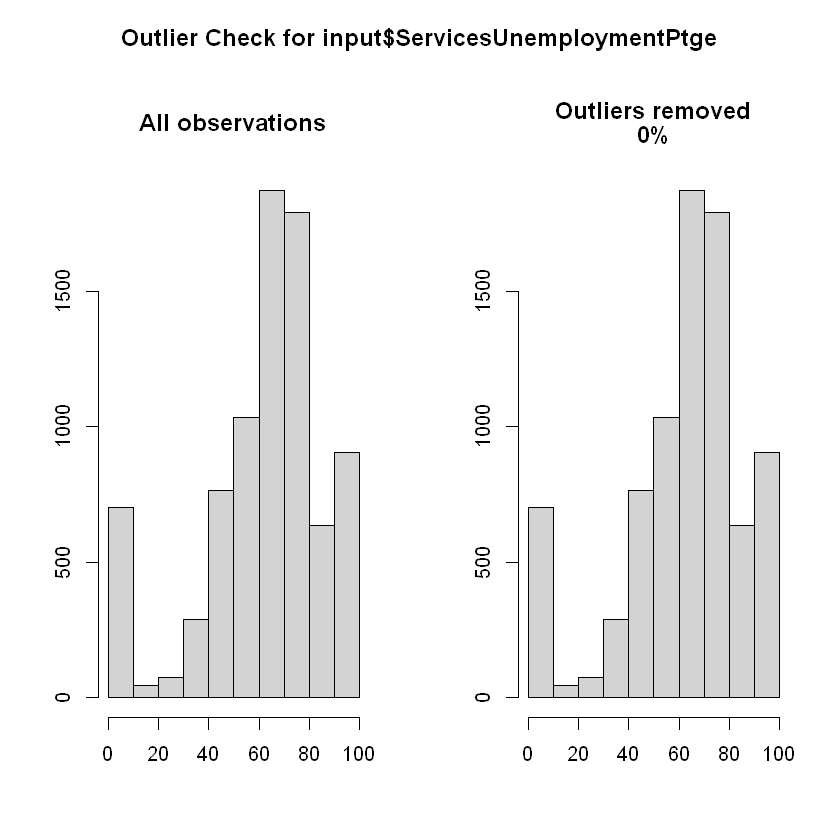

Outliers identified in input$varObjCont: 0 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




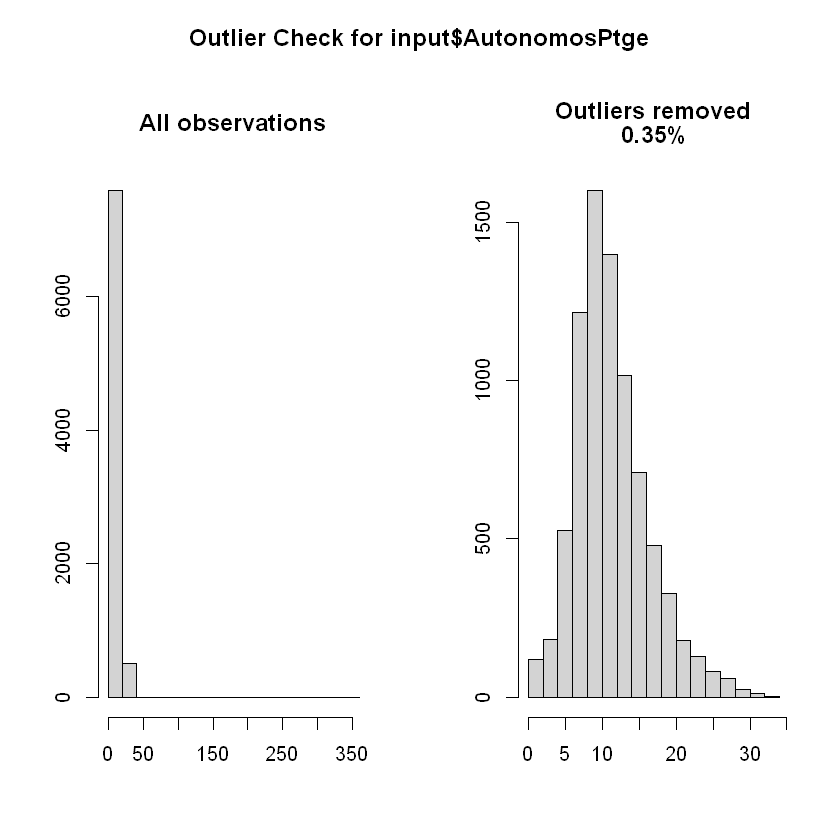

Outliers identified in input$varObjBin: 1448 from 8110 observations



Do you want to replace outliers with NA? [yes/no]: n


Nothing changed




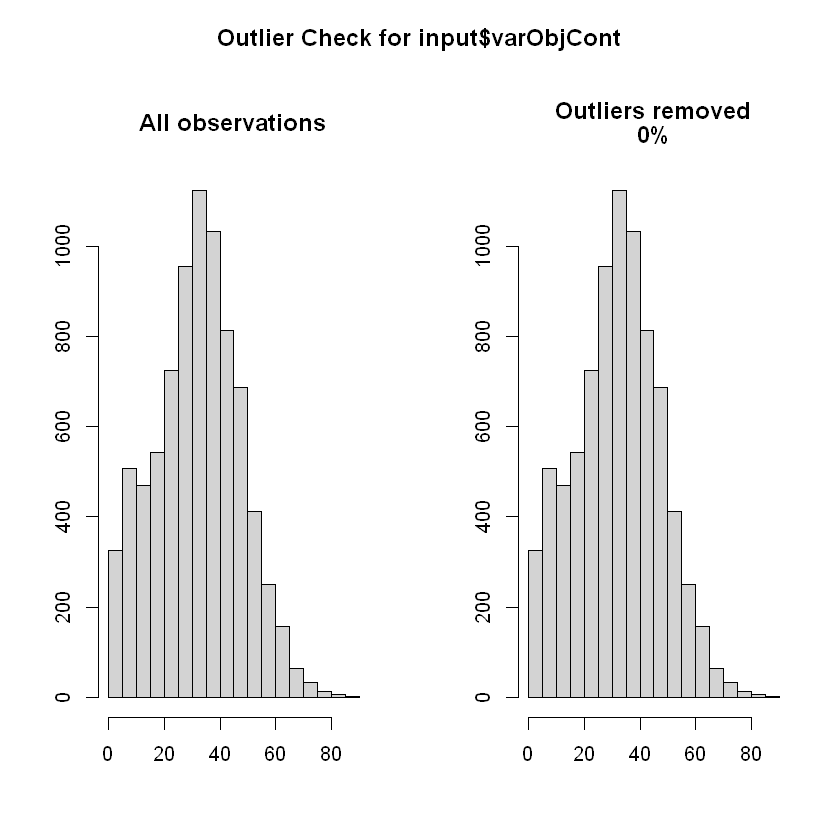

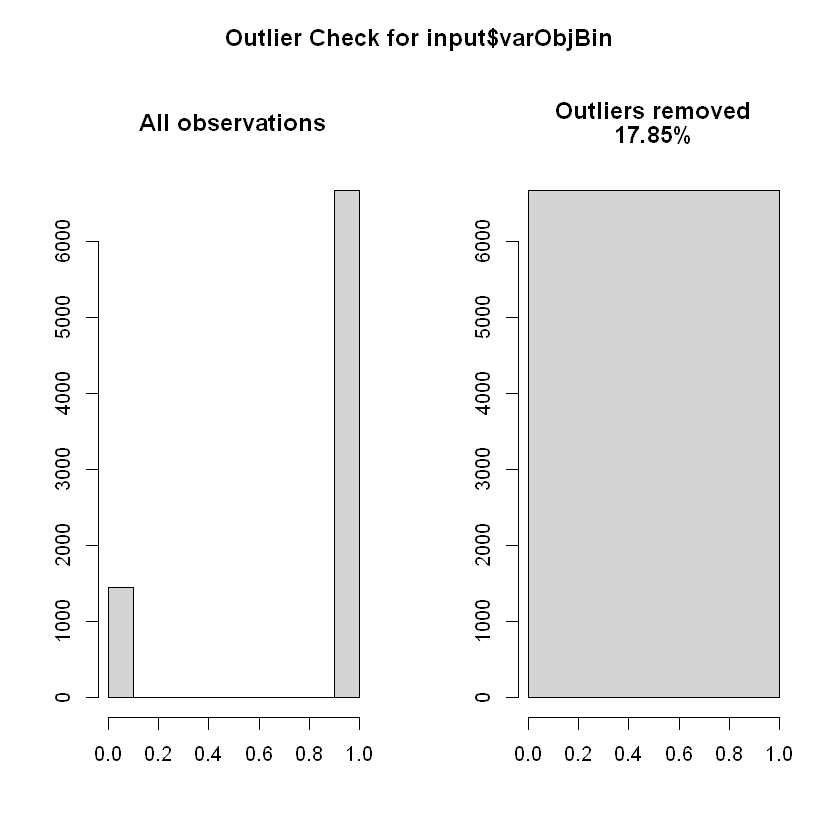

In [11]:
for (i in names(which(sapply(input, class)=="numeric"))){
    outliers(paste0("input$",i))
}

### Gestión de datos ausentes

In [6]:
input$prop_missings <- rowMeans(is.na(input))
summary(input$prop_missings)

In [ ]:
# TBD

## Análisis de las relaciones entre variables

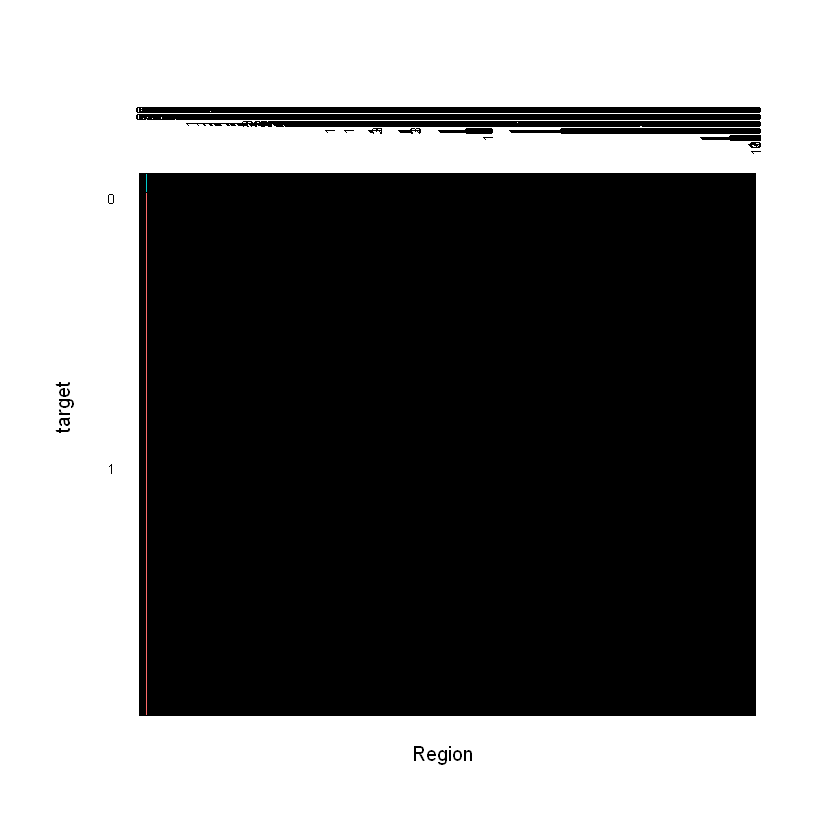

In [42]:
mosaico(datos$VotosEmitidos , varObjBin , "Region")

In [7]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [8]:
library(psych)


Attaching package: 'psych'


The following object is masked from 'package:Hmisc':

    describe


The following objects are masked from 'package:ggplot2':

    %+%, alpha


The following object is masked from 'package:car':

    logit


The following object is masked from 'package:questionr':

    describe




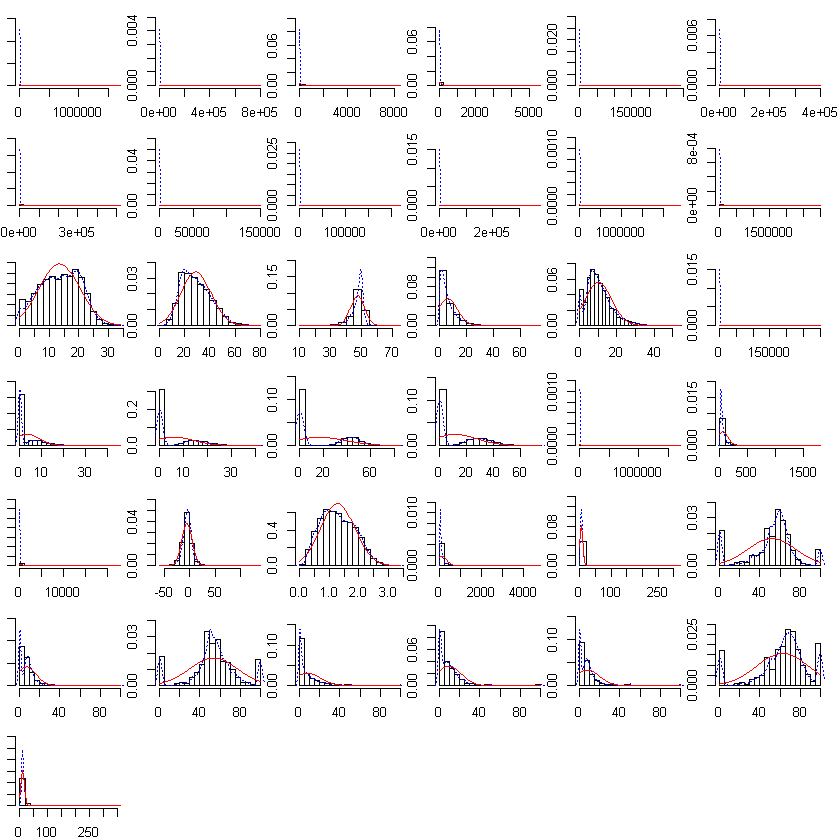

In [9]:
multi.hist(x = nums, dcol = c("blue", "red"), dlty = c("dotted", "solid"),main = "")

In [10]:
modelo <- lm(PSOE ~ VotosEmitidos + Abstenciones + Blancos + Nulos + Cs + PP + VOX + Podemos + Otros, data = nums )

In [11]:
step(object = modelo, direction = "both", trace = 1)

Start:  AIC=-365768.5
PSOE ~ VotosEmitidos + Abstenciones + Blancos + Nulos + Cs + 
    PP + VOX + Podemos + Otros



Warning message:
"attempting model selection on an essentially perfect fit is nonsense"


                Df  Sum of Sq        RSS     AIC
<none>                                 0 -365768
- Abstenciones   1          0          0 -365731
- Nulos          1    3905813    3905813   50114
- Blancos        1    4417711    4417711   51113
- VOX            1  231480232  231480232   83220
- Podemos        1  386671197  386671197   87381
- Cs             1  390010296  390010296   87451
- PP             1 1034616441 1034616441   95363
- VotosEmitidos  1 2347407194 2347407194  102007
- Otros          1 2665577063 2665577063  103038



Call:
lm(formula = PSOE ~ VotosEmitidos + Abstenciones + Blancos + 
    Nulos + Cs + PP + VOX + Podemos + Otros, data = nums)

Coefficients:
  (Intercept)  VotosEmitidos   Abstenciones        Blancos          Nulos  
    1.002e-11      1.000e+00      2.852e-16     -1.000e+00     -1.000e+00  
           Cs             PP            VOX        Podemos          Otros  
   -1.000e+00     -1.000e+00     -1.000e+00     -1.000e+00     -1.000e+00  


In [8]:
modelo <- lm(varObjCont ~ ., data = datos )

In [10]:
sapply(Filter(is.numeric, datos), function(x) length(unique(x)))

VotosEmitidos                 Abstenciones 
                        2962                         2040 
                     Blancos                        Nulos 
                         319                          314 
                          Cs                           PP 
                        1072                         1489 
                        PSOE                          VOX 
                        1909                          790 
                     Podemos                        Otros 
                        1049                         1357 
                       Censo                   Population 
                        3287                         3489 
            Age_under19_Ptge              Age_over65_Ptge 
                        6002                         6773 
         WomanPopulationPtge               ForeignersPtge 
                        4519                         5077 
              UniversityPtge                totalEmpresas 
                        1997                         1226 
               IndustriaPtge             ConstruccionPtge 
                        1328                         1452 
     ComercTTEHosteleriaPtge                ServiciosPtge 
                        1796                         1858 
                   Inmuebles                   Superficie 
                        3123                         5709 
                    Densidad                PobChange_pct 
                        4642                         3048 
            PersonasInmueble                Explotaciones 
                         283                          762 
            UnemploymentPtge        WomenUnemploymentPtge 
                        1443                         1785 
         UnemployLess25_Ptge          UnemployMore40_Ptge 
                        1174                         1914 
 AgricultureUnemploymentPtge     IndustryUnemploymentPtge 
                        1540                         1622 
ConstructionUnemploymentPtge     ServicesUnemploymentPtge 
                        1322                         2129 
               AutonomosPtge                   varObjCont 
                        1939                         6291

In [14]:
# A continuación, verificamos que los tipos de variables se hayan asignado correctamente.
str(datos)

tibble[,42] [8,110 x 42] (S3: tbl_df/tbl/data.frame)
 $ CodigoINE                   : chr [1:8110] "01001" "01002" "01003" "01004" ...
 $ VotosEmitidos               : num [1:8110] 1326 5753 835 999 124 ...
 $ Abstenciones                : num [1:8110] 690 2294 341 355 52 ...
 $ Blancos                     : num [1:8110] 25 62 4 11 3 4 5 32 5 1 ...
 $ Nulos                       : num [1:8110] 15 57 2 12 2 2 8 14 5 5 ...
 $ Cs                          : num [1:8110] 31 69 0 21 6 22 8 16 7 3 ...
 $ PP                          : num [1:8110] 73 254 1 83 17 43 20 65 66 23 ...
 $ PSOE                        : num [1:8110] 257 784 26 106 19 75 85 142 34 47 ...
 $ VOX                         : num [1:8110] 39 83 5 7 9 12 3 21 3 0 ...
 $ Podemos                     : num [1:8110] 175 497 50 90 24 45 91 140 9 40 ...
 $ Otros                       : num [1:8110] 711 3947 747 669 44 ...
 $ PartidoMasVotado            : Factor w/ 19 levels "BNG-AGORA REPÚBLICAS",..: 8 8 9 8 8 8 9 8 15 9 ...
 $ CC

## Regresión logística

In [10]:
set.seed(12345)
trainIndex <- createDataPartition(datos$varObjBin, p=0.8, list=FALSE)
data_train <- datos[trainIndex,]
data_test <- datos[-trainIndex,]

In [37]:
modeloInicial <- glm ( varObjBin ~ VotosEmitidos + Abstenciones + Blancos + Nulos + Cs + PP + VOX + Podemos + Otros ,data= data_train[,c(1:12,43)], family=binomial)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [38]:
pseudoR2(modeloInicial,data_train,"varObjBin")

[1] 0.7184933

In [39]:
pseudoR2(modeloInicial,data_test,"varObjBin")

[1] 0.6698372

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


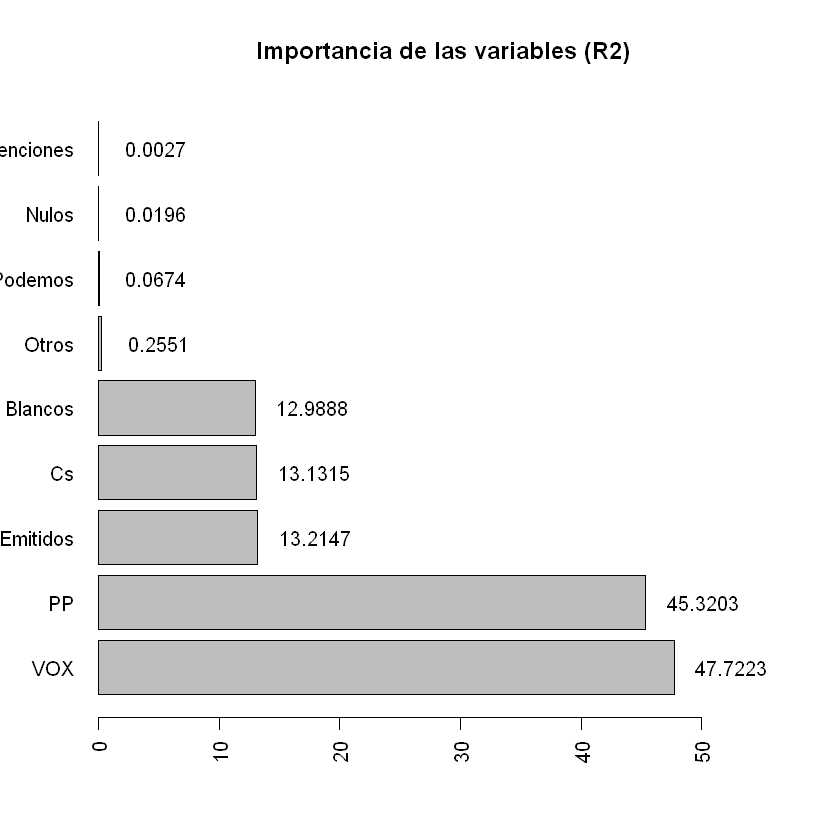

In [40]:
importanciaVariablesLog(modeloInicial)


In [68]:
ncol(data_train)

[1] 43

In [52]:
length(varObjBin)

[1] 8110

In [53]:
nrow(data_train)

[1] 6488

## Regresión lineal

In [51]:
modeloRL <- lm(varObjCont ~ VotosEmitidos + Abstenciones + Blancos + Nulos + Cs + PP + VOX + Podemos+ Otros + PartidoMasVotado, data = data_train[,c(1:12,42)] )


In [49]:
data_train

CodigoINE,VotosEmitidos,Abstenciones,Blancos,Nulos,Cs,PP,PSOE,VOX,Podemos,...,WomenUnemploymentPtge,UnemployLess25_Ptge,UnemployMore40_Ptge,AgricultureUnemploymentPtge,IndustryUnemploymentPtge,ConstructionUnemploymentPtge,ServicesUnemploymentPtge,AutonomosPtge,varObjCont,varObjBin
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01001,1326,690,25,15,31,73,257,39,175,...,55.40,5.76,48.20,2.88,12.23,3.60,64.75,10.27,19.381599,0
01002,5753,2294,62,57,69,254,784,83,497,...,61.46,7.16,47.71,3.58,12.46,5.87,62.61,7.84,13.627673,0
01003,835,341,4,2,0,1,26,5,50,...,42.86,0.00,64.29,0.00,42.86,14.29,42.86,4.59,3.113772,0
01004,999,355,11,12,21,83,106,7,90,...,71.74,3.26,50.00,3.26,16.30,3.26,59.78,8.05,10.610611,0
01006,124,52,3,2,6,17,19,9,24,...,44.44,11.11,44.44,0.00,0.00,0.00,100.00,11.36,15.322581,0
01008,531,272,4,2,22,43,75,12,45,...,55.88,17.65,67.65,2.94,17.65,0.00,67.65,13.45,14.124294,0
01011,196,32,5,5,7,66,34,3,9,...,66.67,44.44,44.44,44.44,11.11,0.00,22.22,35.53,17.346939,1
01013,474,238,1,5,3,23,47,0,40,...,44.44,5.56,61.11,0.00,16.67,11.11,72.22,17.56,9.915612,0
01014,299,72,5,8,16,41,45,7,29,...,69.23,0.00,46.15,0.00,30.77,0.00,53.85,11.05,15.050167,0


In [52]:
summary(modeloRL)


Call:
lm(formula = varObjCont ~ VotosEmitidos + Abstenciones + Blancos + 
    Nulos + Cs + PP + VOX + Podemos + Otros + PartidoMasVotado, 
    data = data_train[, c(1:12, 42)])

Residuals:
    Min      1Q  Median      3Q     Max 
-25.610  -5.900  -0.263   5.759  45.087 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                  2.274e+01  5.102e+00   4.457
VotosEmitidos                                2.941e-03  2.354e-04  12.496
Abstenciones                                -2.778e-04  6.495e-05  -4.277
Blancos                                     -4.977e-02  4.959e-03 -10.037
Nulos                                       -7.144e-03  5.333e-03  -1.340
Cs                                          -3.518e-03  5.640e-04  -6.237
PP                                          -3.201e-03  3.374e-04  -9.487
VOX                                         -4.959e-03  7.101e-04  -6.983
Podemos                                     -4.